In [38]:
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, balanced_accuracy_score, accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt 

%matplotlib inline

In [2]:
df = pd.read_csv('Resources/mushrooms_expanded.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,poisonous,convex,smooth,brown,bruises,pungent,free,close,narrow,black,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
1,edible,convex,smooth,yellow,bruises,almond,free,close,broad,black,...,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
2,edible,bell,smooth,white,bruises,anise,free,close,broad,brown,...,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows
3,poisonous,convex,scaly,white,bruises,pungent,free,close,narrow,brown,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
4,edible,convex,smooth,gray,no_bruises,none,free,crowded,broad,black,...,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses


In [4]:
y = df['class']
X = df.drop(columns='class')

In [5]:
X[:5]

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,convex,smooth,brown,bruises,pungent,free,close,narrow,black,enlarging,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
1,convex,smooth,yellow,bruises,almond,free,close,broad,black,enlarging,...,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
2,bell,smooth,white,bruises,anise,free,close,broad,brown,enlarging,...,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows
3,convex,scaly,white,bruises,pungent,free,close,narrow,brown,enlarging,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
4,convex,smooth,gray,no_bruises,none,free,crowded,broad,black,tapering,...,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses


In [6]:
y[:5]

0    poisonous
1       edible
2       edible
3    poisonous
4       edible
Name: class, dtype: object

In [7]:
X = pd.get_dummies(X)

In [8]:
X.head()

,cap-shape_bell,cap-shape_conical,cap-shape_convex,cap-shape_flat,cap-shape_knobbed,cap-shape_sunken,cap-surface_fibrous,cap-surface_grooves,cap-surface_scaly,cap-surface_smooth,...,population_scattered,population_several,population_solitary,habitat_grasses,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste,habitat_woods
0,0,0,1,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
1,0,0,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,0,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [10]:
X_train.shape

(6093, 117)

In [11]:
X_test.shape

(2031, 117)

In [12]:
scaler = StandardScaler()

X_scaler = scaler.fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Fitting the KNeighbors Model

In [13]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

In [14]:
y_pred = model.predict(X_test_scaled)
y_pred

array(['edible', 'poisonous', 'poisonous', ..., 'poisonous', 'poisonous',
       'poisonous'], dtype=object)

In [15]:
confusion_matrix(y_pred,y_test)

array([[1020,    2],
       [   0, 1009]], dtype=int64)

In [16]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

      edible       1.00      1.00      1.00      1022
   poisonous       1.00      1.00      1.00      1009

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



In [18]:
balanced_accuracy_score(y_test, y_pred)

0.9990108803165183

In [19]:
y_pred_train = model.predict(X_train_scaled)
y_pred_train

array(['poisonous', 'edible', 'poisonous', ..., 'poisonous', 'edible',
       'poisonous'], dtype=object)

In [20]:
confusion_matrix(y_pred_train,y_train)

array([[3188,    1],
       [   0, 2904]], dtype=int64)

In [21]:
print(classification_report(y_pred_train,y_train))

              precision    recall  f1-score   support

      edible       1.00      1.00      1.00      3189
   poisonous       1.00      1.00      1.00      2904

    accuracy                           1.00      6093
   macro avg       1.00      1.00      1.00      6093
weighted avg       1.00      1.00      1.00      6093



In [22]:
balanced_accuracy_score(y_train, y_pred_train)

0.999827882960413

## Fitting the Random Forest Model

In [23]:
rf_model = RandomForestClassifier(n_estimators=500, random_state=70)
rf_model = rf_model.fit(X_train_scaled, y_train)

In [25]:
rf_pred = rf_model.predict(X_test_scaled)

In [26]:
cm = confusion_matrix(y_test, rf_pred)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

acc_score = accuracy_score(y_test, rf_pred)

print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, rf_pred))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,1020,0
Actual 1,0,1011


Accuracy Score : 1.0
Classification Report
              precision    recall  f1-score   support

      edible       1.00      1.00      1.00      1020
   poisonous       1.00      1.00      1.00      1011

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



## Feature Importance

In [27]:
importances = rf_model.feature_importances_
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.11681406252198812, 'odor_none'),
 (0.08666263589659538, 'odor_foul'),
 (0.062110701928835936, 'gill-size_broad'),
 (0.061939598077957146, 'gill-size_narrow'),
 (0.04734830315279753, 'gill-color_buff'),
 (0.04584764144232957, 'stalk-surface-above-ring_silky'),
 (0.04058244321585617, 'spore-print-color_chocolate'),
 (0.03861289526897821, 'stalk-surface-below-ring_silky'),
 (0.030948746344492826, 'ring-type_pendant'),
 (0.025513554062967896, 'bruises_no_bruises'),
 (0.023174586920877423, 'stalk-surface-above-ring_smooth'),
 (0.022412510712423773, 'bruises_bruises'),
 (0.019719548801594503, 'gill-spacing_crowded'),
 (0.01911251509798522, 'population_several'),
 (0.01714671677314359, 'gill-spacing_close'),
 (0.0159651957457839, 'odor_pungent'),
 (0.015534220400550608, 'stalk-root_equal'),
 (0.015372454778365928, 'stalk-root_bulbous'),
 (0.01444076307952484, 'stalk-shape_tapering'),
 (0.014427676566471417, 'spore-print-color_white'),
 (0.014046825060239203, 'ring-type_large'),
 (0.012484

<Axes: title={'center': 'Features Importances'}, ylabel='1'>

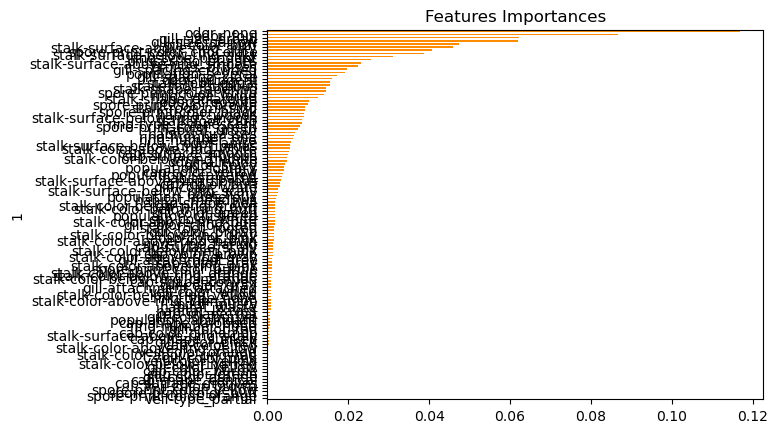

In [42]:
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='darkorange', title= 'Features Importances', legend=False)